<a href="https://colab.research.google.com/github/Komal7209/ServerTemperaturePredictionToBeShared/blob/main/ServerTemperaturePrediction5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
#some hyperparameters
num_epochs = 40  #100  #500 #2000 #200 #20   # more epoch , model will memorise training data
learning_rate = 0.01 #0.0001 #0.005  #0.01
seq_length =4

#if learning rate is low then we can increase epoch so that it do not memorise

In [ ]:
class TemperatureData(Dataset):
  def __init__(self, x, y):
    super().__init__()
    assert x.shape[0] == y.shape[0]
    self.x = x
    self.y = y

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

  def __len__(self):
    return self.x.shape[0]

##Ambient Temperature System Failure Plot

In [ ]:
#taking the second columnn [temperature]
training_set = pd.read_csv('/content/drive/MyDrive/ServerTemperaturePrediction/ambient_temperature_system_failure.csv').iloc[:1000,1:] #choosing 2nd column because 1

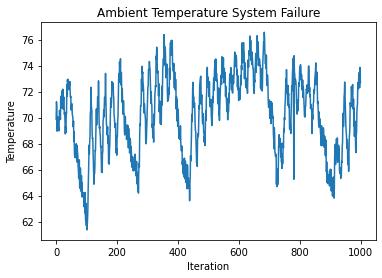

In [ ]:
#plotting the iteration vs temperature graph

plt.plot(training_set, label = 'ambient_temperature_system_failure')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Ambient Temperature System Failure')
plt.show()

##Dataloading

In [ ]:
#2
# Generates Training , Testing inputs and labels 

def slidingwindownew(data, seq_length):
  x, y = [], []

  for i in range(len(data) - seq_length):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])

  return np.array(x),np.array(y)

In [ ]:
'''
x = [
     [1,2,3,4],
     [2,3,4,5],
     [3,4,5,6],
     [4,5,6,7],
     [5,6,7,8],
     [6,7,8,9]
]
'''

In [ ]:
'''
y = [
  [5],
  [6],
  [7],
  [8],
  [9]
]
'''

In [ ]:
#1
# seq_length = 4

#Scaling the input/normalisation

sc = MinMaxScaler() #scaling so that value variation doesnt affect much
training_data = sc.fit_transform(training_set)

x, y = slidingwindownew(training_data, seq_length)

In [ ]:
#3
x.shape, y.shape

((996, 4, 1), (996, 1))

In [ ]:
training_set

,value
0,69.880835
1,71.220227
2,70.877805
3,68.959400
4,69.283551
...,...
995,73.494126
996,72.300667
997,73.866681
998,72.670185


In [ ]:
training_data.shape

(1000, 1)

In [ ]:
#4
# Generates Training , Testing inputs and labels 

train_size = int(len(y) * 0.70)
test_size = int(len(y)*0.20)

# trainX, trainY = torch.tensor(x[:train_size]).type(torch.float32) , torch.tensor(y[:train_size]).type(torch.float32)
trainX, trainY = torch.tensor(x[train_size: train_size+test_size]).type(torch.float32) , torch.tensor(y[train_size: train_size+test_size]).type(torch.float32)
# testX, testY = torch.tensor(x[train_size:]).type(torch.float32), torch.tensor(y[train_size:]).type(torch.float32)
testX, testY = torch.tensor(x[train_size+test_size:]).type(torch.float32), torch.tensor(y[train_size+test_size:]).type(torch.float32)

In [ ]:
trainX.shape , trainY.shape , testX.shape , testY.shape

(torch.Size([199, 4, 1]),
 torch.Size([199, 1]),
 torch.Size([100, 4, 1]),
 torch.Size([100, 1]))

In [ ]:
''''

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler() #scaling so that value variation doesnt affect much
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x))) #Variable function is of pytorch
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

'''

"'\n\ndef sliding_windows(data, seq_length):\n    x = []\n    y = []\n\n    for i in range(len(data)-seq_length-1):\n        _x = data[i:(i+seq_length)]\n        _y = data[i+seq_length]\n        x.append(_x)\n        y.append(_y)\n\n    return np.array(x),np.array(y)\n\nsc = MinMaxScaler() #scaling so that value variation doesnt affect much\ntraining_data = sc.fit_transform(training_set)\n\nseq_length = 4\nx, y = sliding_windows(training_data, seq_length)\n\ntrain_size = int(len(y) * 0.67)\ntest_size = len(y) - train_size\n\ndataX = Variable(torch.Tensor(np.array(x))) #Variable function is of pytorch\ndataY = Variable(torch.Tensor(np.array(y)))\n\ntrainX = Variable(torch.Tensor(np.array(x[0:train_size])))\ntrainY = Variable(torch.Tensor(np.array(y[0:train_size])))\n\ntestX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))\ntestY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))\n\n"

##LSTM Model

In [66]:
class LSTM(nn.Module):
  
  # num_classes = 1
  # num_layers = 1
  # input_size = 1
  # hidden_size = 2
  # seq_length = 4



    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        # we could remove below initialisations 
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        # till here but need to uncomment above section and remove those from training section
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        return self.fc(h_out)

##Training

In [109]:
input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1
batch_size = 16

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)


train_datamodule = TemperatureData(trainX, trainY)
train_loader = DataLoader(train_datamodule, batch_size=batch_size, shuffle = True) #batches are shuffles not the value inside batches

val_datamodule = TemperatureData(testX, testY)
val_loader = DataLoader(val_datamodule, batch_size=batch_size, shuffle = True)



training_losses, validation_losses =[],[]
# losses = []

# Train the model (training loop)
for epoch in range(num_epochs):
  
  #training
  for d in train_loader:
    x, y = d
    l = 0
    lstm.train()
    outputs = lstm(x)
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    l += loss.item()
  training_losses.append(l/len(train_loader))

  #validation
  for d in val_loader:
    x, y = d
    l = 0
    lstm.eval()
    outputs = lstm(x)
    optimizer.zero_grad()
    # obtain the loss function
    loss = criterion(outputs, y)
    l += loss.item()
  validation_losses.append(l/len(val_loader))
  
  if epoch % 5 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.72011
Epoch: 5, loss: 0.01976
Epoch: 10, loss: 0.00856
Epoch: 15, loss: 0.01457
Epoch: 20, loss: 0.01028
Epoch: 25, loss: 0.00284
Epoch: 30, loss: 0.01078
Epoch: 35, loss: 0.00057


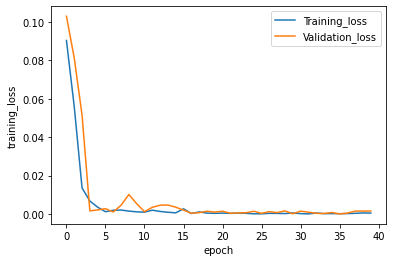

In [110]:
#loss vs epoch graph
plt.plot( training_losses, label = 'Loss vs Epoch during training')
plt.plot(validation_losses)
plt.xlabel('epoch')
plt.ylabel('training_loss')
plt.legend(['Training_loss', 'Validation_loss'])
plt.show()

#loss vs epoch graph
# plt.plot(training_losses[:100])
# plt.plot(validation_losses)
# plt.xlabel('epoch')
# plt.ylabel('training_loss')
# plt.legend(['Training_loss', 'Validation_loss'])
# plt.show()

#validation >sample size

##Testing for Ambient Temperature System Failure



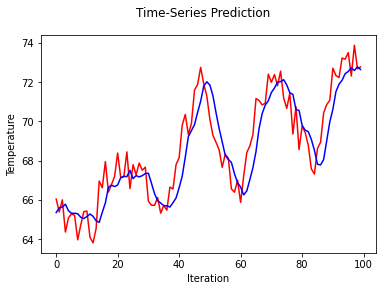

In [111]:
# lstm.eval()
# train_predict = lstm(dataX)

# data_predict = train_predict.data.numpy()
# dataY_plot = dataY.data.numpy()

# data_predict = sc.inverse_transform(data_predict)
# dataY_plot = sc.inverse_transform(dataY_plot)

# plt.axvline(x=train_size, c='r', linestyle='--')

# plt.plot(dataY_plot)
# plt.plot(data_predict)
# plt.suptitle('Time-Series Prediction')
# plt.xlabel('Iteration')
# plt.ylabel('Temperature')
# plt.show()

lstm.eval()
test_predict = lstm(testX).detach().numpy()
test_labels = testY.numpy()

data_predict = sc.inverse_transform(test_predict)
dataY_plot = sc.inverse_transform(test_labels)

# plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot, c = 'red')
plt.plot(data_predict, c = 'blue')
plt.suptitle('Time-Series Prediction')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()



##Graph


In [ ]:
!pip install torchviz 

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=24f3526b7b66191c1179492bace7e87d75fede69a38a16d20599634f9e256d93
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
from torchviz import make_dot

In [ ]:
dummy_batch = lstm(testX)
with torch.no_grad():
  image = make_dot(dummy_batch, params=dict(list(lstm.named_parameters()))).render("rnn_torchviz", format="png")

In [ ]:
image

'rnn_torchviz.png'

In [ ]:
!pip install hiddenlayer

In [ ]:
import hiddenlayer as hl

transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.

graph = hl.build_graph(lstm, testX, transforms=transforms)
graph.theme = hl.graph.THEMES['blue'].copy()
graph.save('rnn_hiddenlayer', format='png')

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2123: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  "or define the initial states (h0/c0) as inputs of the model. ")


In [ ]:
!pip install netron

     |████████████████████████████████| 1.4 MB 28.4 MB/s 


In [ ]:
#input_names = ['Sentence']
#output_names = ['yhat']
# torch.onnx.export(lstm, dataX, 'rnn.onnx')

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2123: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  "or define the initial states (h0/c0) as inputs of the model. ")


In [ ]:
#Visualisation of Model 
torch.onnx.export(lstm, testX, 'rnn.onnx')

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2123: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  "or define the initial states (h0/c0) as inputs of the model. ")


In [ ]:
#Visualisation of Model 

dummy = torch.unsqueeze(testX[0],0) #gather one sample point
torch.onnx.export(lstm, dummy, 'rnn.onnx')

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_opset9.py:2123: UserWarning: Exporting a model to ONNX with a batch_size other than 1, with a variable length with LSTM can cause an error when running the ONNX model with a different batch size. Make sure to save the model with a batch size of 1, or define the initial states (h0/c0) as inputs of the model. 
  "or define the initial states (h0/c0) as inputs of the model. ")


In [112]:
#Dont need to run again
#Save Model
#!cd ServerTemperaturePrediction
torch.save(lstm.state_dict(), '/content/drive/MyDrive/ServerTemperaturePrediction/model5.pt')

#Dont need to run again
#Load Model
model5 = LSTM(num_classes, input_size, hidden_size, num_layers)
model5.load_state_dict(torch.load('/content/drive/MyDrive/ServerTemperaturePrediction/model5.pt'))
model5.eval() #here input would be given

LSTM(
  (lstm): LSTM(1, 2, batch_first=True)
  (fc): Linear(in_features=2, out_features=1, bias=True)
)

### Reference: https://stackoverflow.com/questions/52468956/how-do-i-visualize-a-net-in-pytorch


Time series sequential model 
